# Skip List Implementation and Demo

In [2]:
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

class SkipListNode:
    def __init__(self, value, level):
        self.value = value
        self.forward = [None] * (level + 1)

class SkipList:
    def __init__(self, max_level=4, p=0.5):
        self.max_level = max_level
        self.p = p
        self.header = SkipListNode(-1, self.max_level)
        self.level = 0
        self.history = []

    def random_level(self):
        lvl = 0
        while random.random() < self.p and lvl < self.max_level:
            lvl += 1
        return lvl

    def insert(self, value):
        update = [None] * (self.max_level + 1)
        current = self.header

        for i in reversed(range(self.level + 1)):
            while current.forward[i] and current.forward[i].value < value:
                current = current.forward[i]
            update[i] = current

        current = current.forward[0]
        if current is None or current.value != value:
            new_level = self.random_level()
            if new_level > self.level:
                for i in range(self.level + 1, new_level + 1):
                    update[i] = self.header
                self.level = new_level
            new_node = SkipListNode(value, new_level)
            for i in range(new_level + 1):
                new_node.forward[i] = update[i].forward[i]
                update[i].forward[i] = new_node

            self.visualize(f'Insert {value} (Level {new_level + 1})')
        else:
            self.visualize(f'Insert {value} (Already exists)')

    def search(self, value):
        current = self.header
        found = False

        for i in reversed(range(self.level + 1)):
            while current.forward[i] and current.forward[i].value < value:
                current = current.forward[i]
                self.visualize(f'Search {value} (Checking {current.value} at Level {i + 1})',
                               highlight=[(current.value, i)])

            self.visualize(f'Search {value} (Stopped at {current.value if current.value != -1 else "start"} at Level {i + 1})',
                           highlight=[(current.value, i)])

        current = current.forward[0]
        found = current and current.value == value

        if found:
            self.visualize(f'Search {value} (Found!)', highlight=[(current.value, 0)])
        else:
            self.visualize(f'Search {value} (Not Found)')
        return found

    def delete(self, value):
        update = [None] * (self.max_level + 1)
        current = self.header
        found = False

        for i in reversed(range(self.level + 1)):
            while current.forward[i] and current.forward[i].value < value:
                current = current.forward[i]
            update[i] = current

        current = current.forward[0]
        if current and current.value == value:
            found = True
            self.visualize(f'Deleting {value} (Before Removal)', highlight=value)

            for i in range(self.level + 1):
                if update[i].forward[i] != current:
                    continue
                update[i].forward[i] = current.forward[i]
            while self.level > 0 and self.header.forward[self.level] is None:
                self.level -= 1

        self.visualize(f'Delete {value}{" (Not Found)" if not found else ""}')

    def visualize(self, title, highlight=None):
        fig, ax = plt.subplots(figsize=(12, 2 + self.max_level))
        ax.set_title(title)
        ax.axis('off')

        # Flatten structure into a list of nodes with levels
        nodes = []
        current = self.header.forward[0]
        while current:
            nodes.append(current)
            current = current.forward[0]

        x_spacing = 2
        y_spacing = 1
        node_positions = {}

        # Draw nodes
        for i, node in enumerate(nodes):
            for lvl in range(len(node.forward)):
                x = i * x_spacing + 2
                y = (self.max_level - lvl) * y_spacing

                is_highlighted = False
                if isinstance(highlight, list):
                    is_highlighted = (node.value, lvl) in highlight
                elif isinstance(highlight, int):
                    is_highlighted = node.value == highlight

                color = 'red' if is_highlighted else 'lightblue'
                circle = Circle((x, y), 0.3, color=color, ec='black')
                ax.add_patch(circle)
                ax.text(x, y, str(node.value), ha='center', va='center', fontsize=10)
                node_positions[(node.value, lvl)] = (x, y)

        for lvl in range(self.level + 1):
            if self.header.forward[lvl]:
                x1 = 0.5
                y1 = (self.max_level - lvl) * y_spacing
                next_node = self.header.forward[lvl]
                if (next_node.value, lvl) in node_positions:
                    x2, y2 = node_positions[(next_node.value, lvl)]
                    ax.annotate('', xy=(x2 - 0.3, y2), xytext=(x1, y1),
                                arrowprops=dict(arrowstyle='->', lw=1))

        for node in nodes:
            for lvl in range(len(node.forward)):
                if node.forward[lvl]:
                    x1, y1 = node_positions[(node.value, lvl)]
                    x2, y2 = node_positions[(node.forward[lvl].value, lvl)]
                    ax.annotate('', xy=(x2 - 0.3, y2), xytext=(x1 + 0.3, y1),
                                arrowprops=dict(arrowstyle='->', lw=1))

        # Draw level labels
        for lvl in range(self.max_level + 1):
            y = (self.max_level - lvl) * y_spacing
            ax.text(-0.5, y, f'Level {lvl + 1}', ha='right', va='center', fontsize=10, fontweight='bold')

        ax.set_xlim(-2, len(nodes) * x_spacing + 4)
        ax.set_ylim(-1, (self.max_level + 2) * y_spacing)
        plt.tight_layout()
        plt.show()

s = SkipList(max_level=2)

# Inserting Values

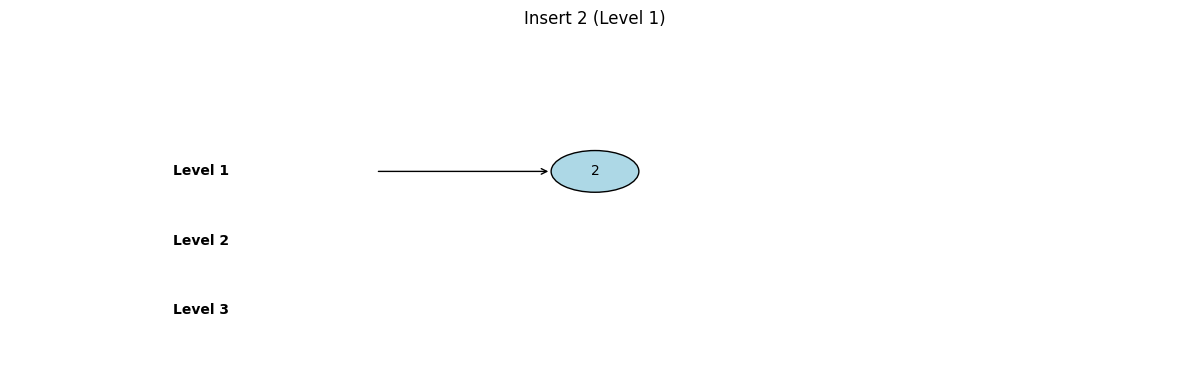

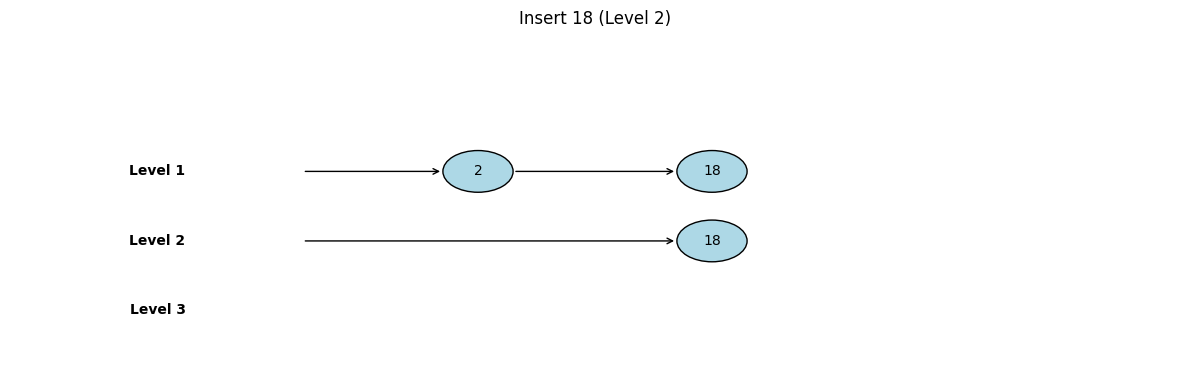

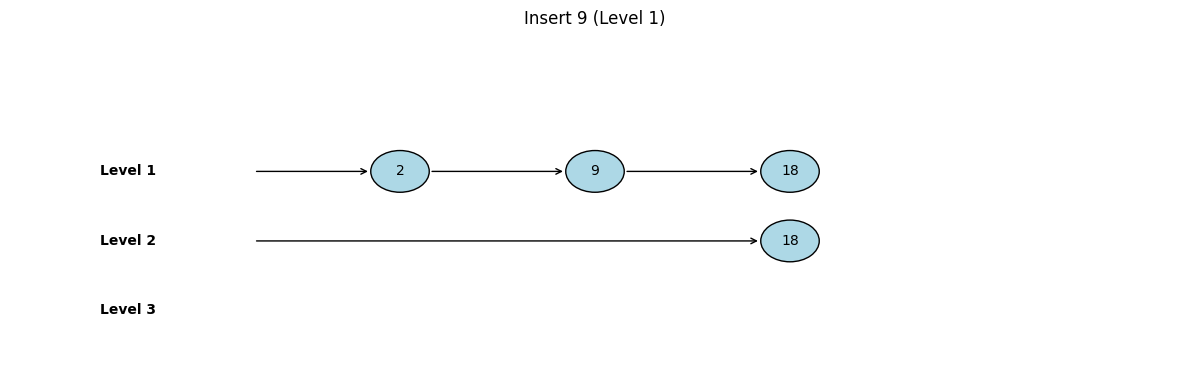

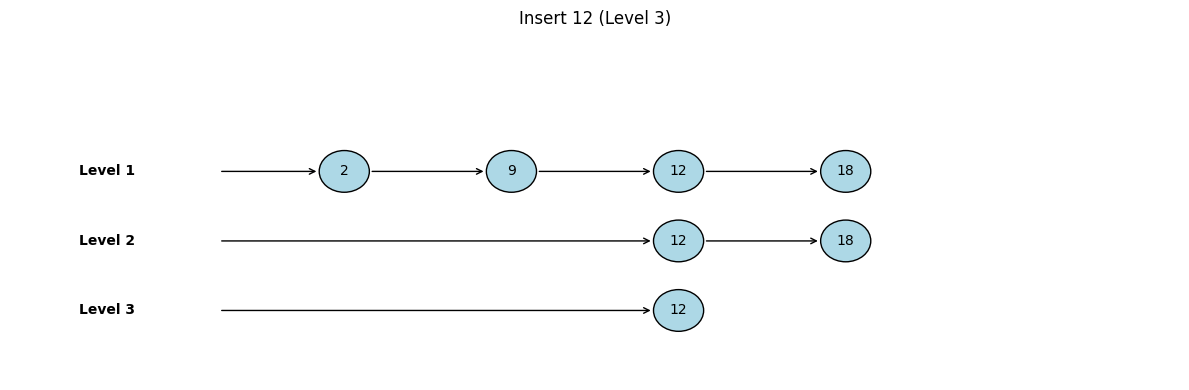

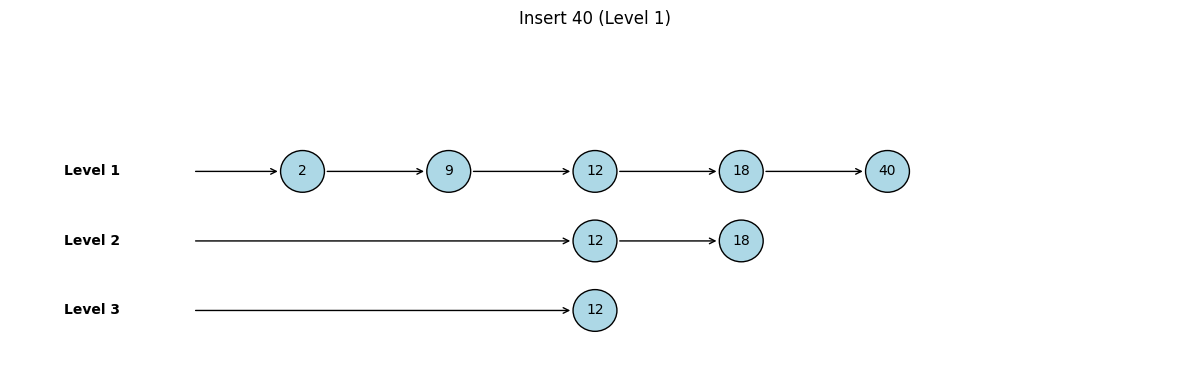

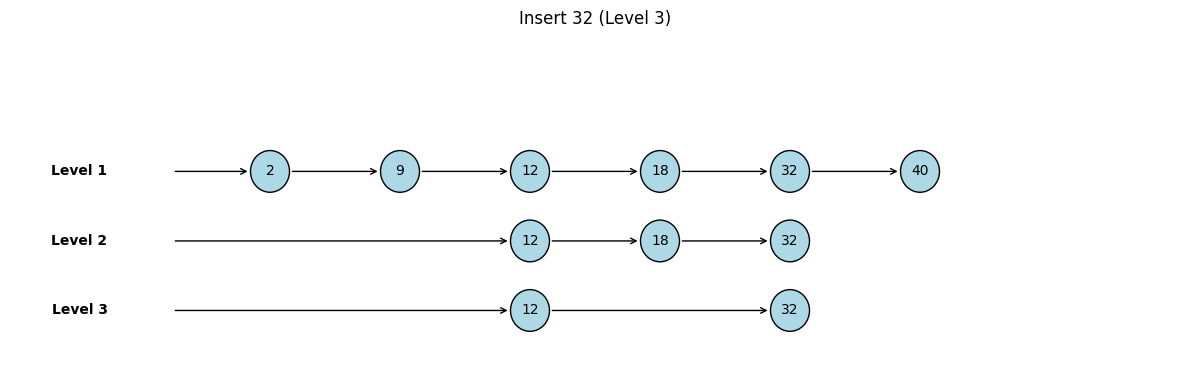

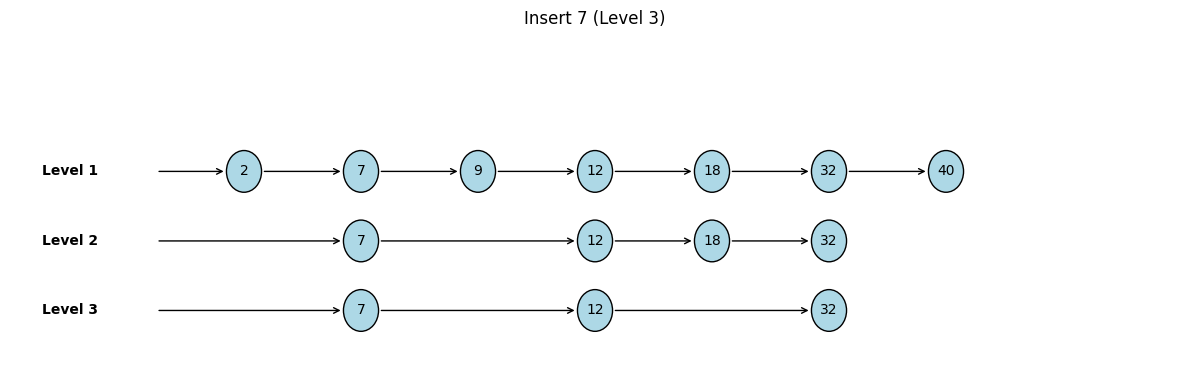

In [3]:
values = [2, 18, 9, 12, 40, 32, 7]
for value in values:
  s.insert(value)

# Searching For Values

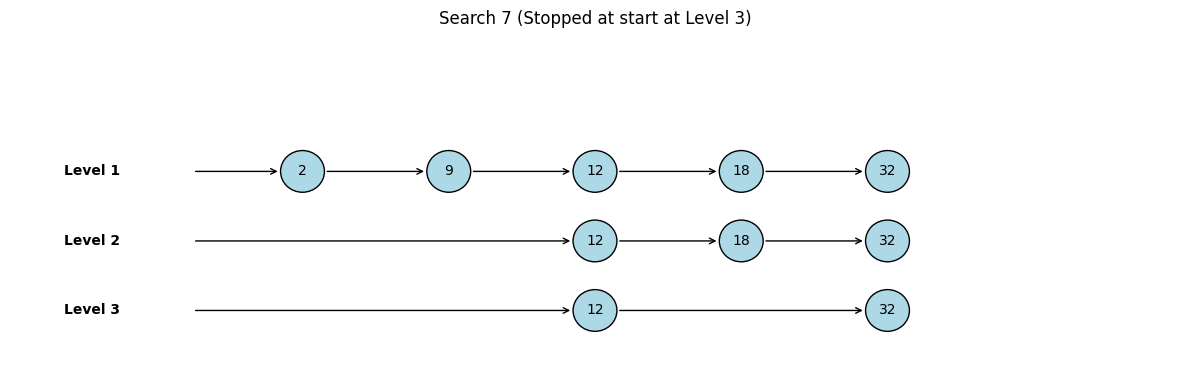

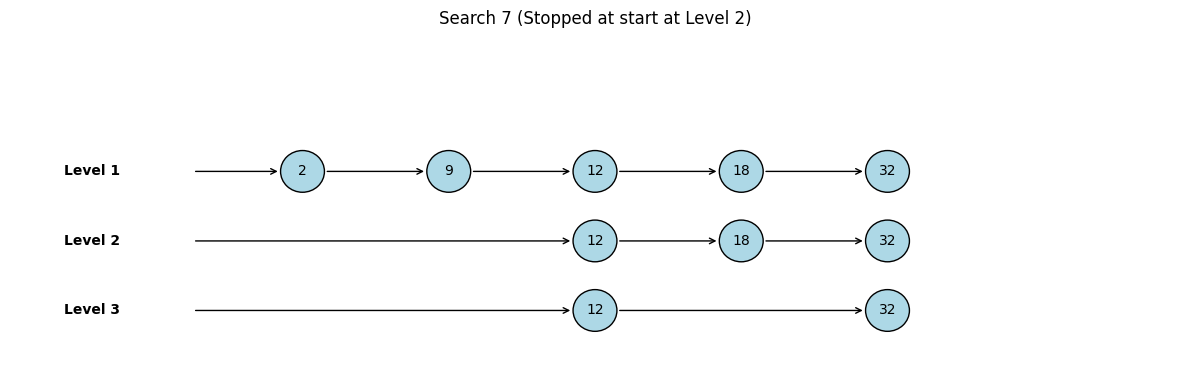

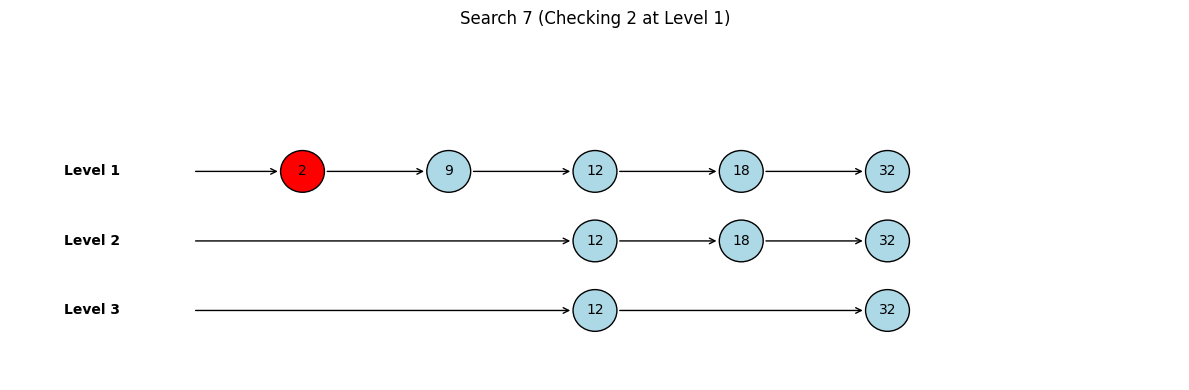

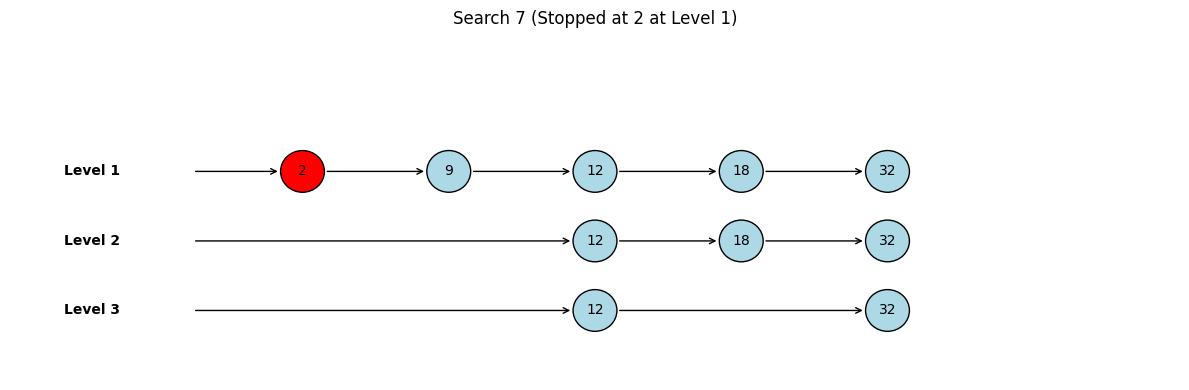

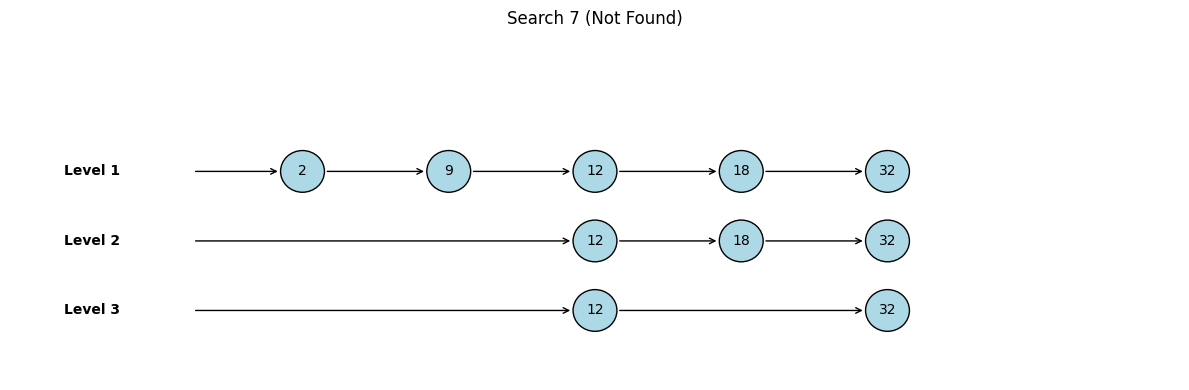

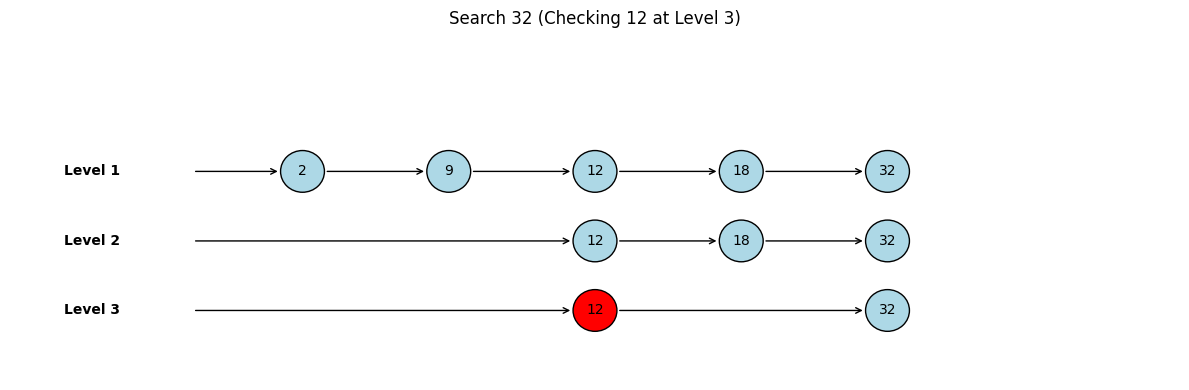

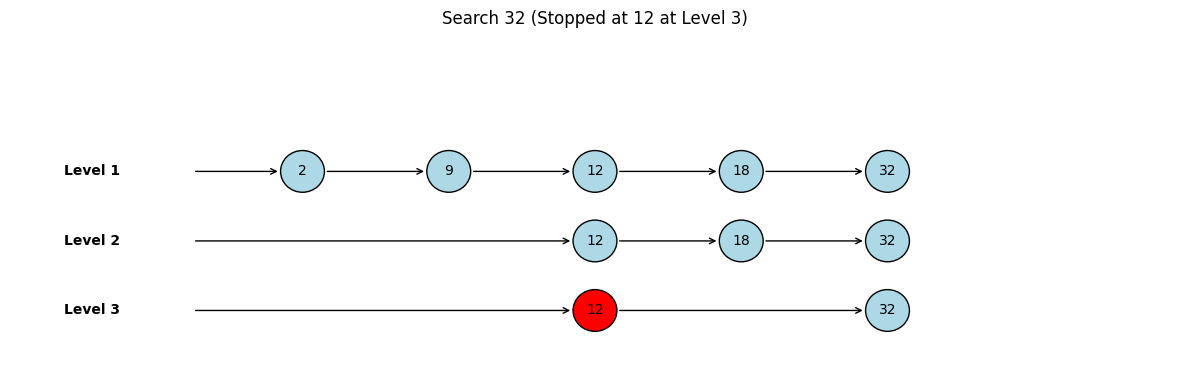

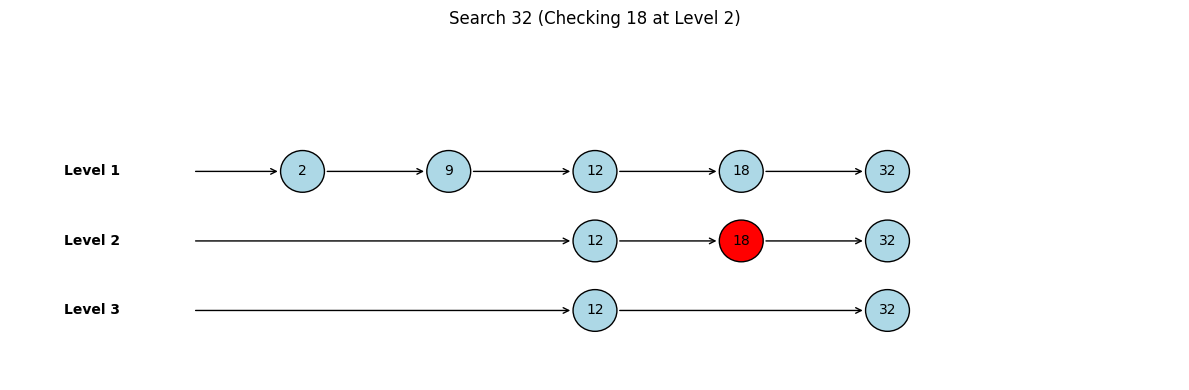

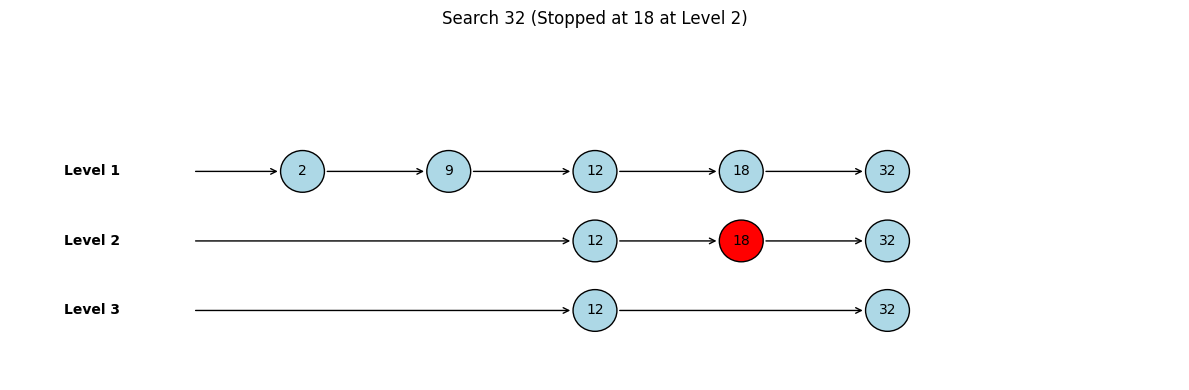

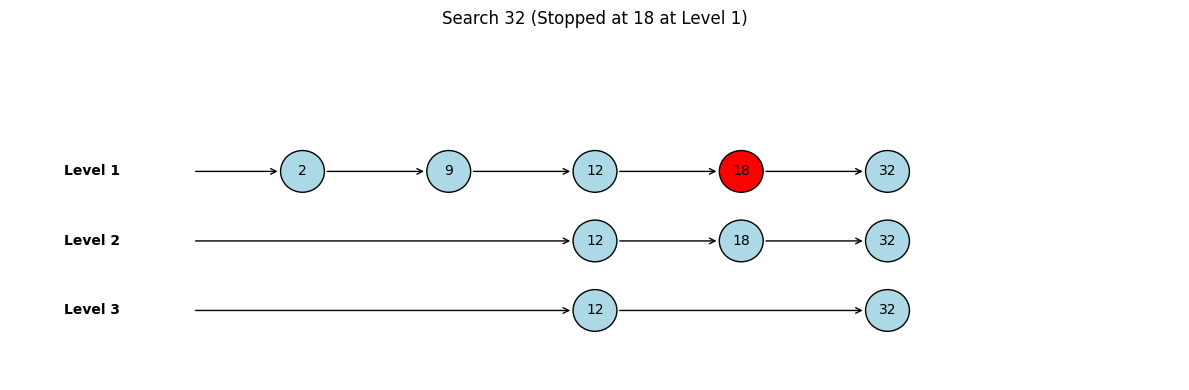

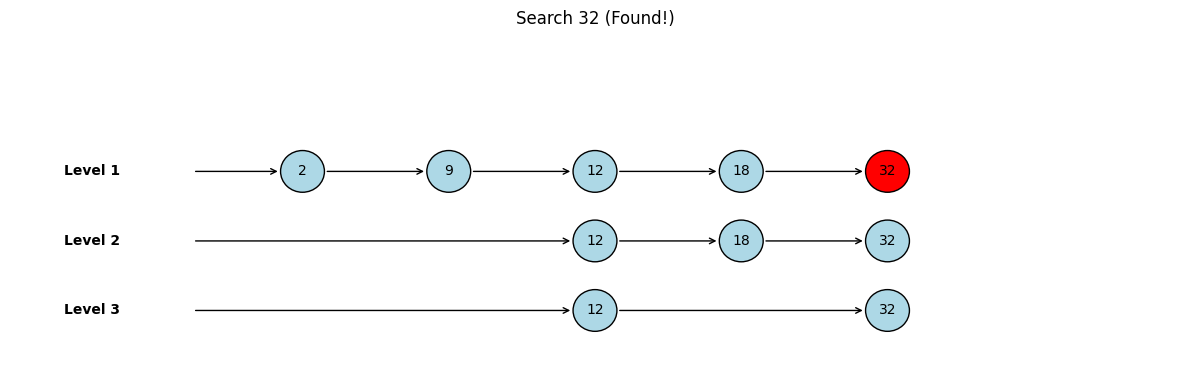

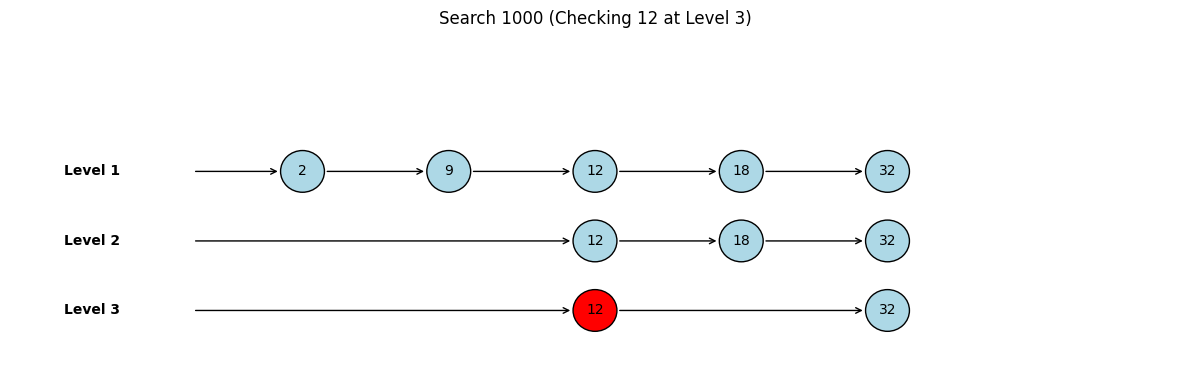

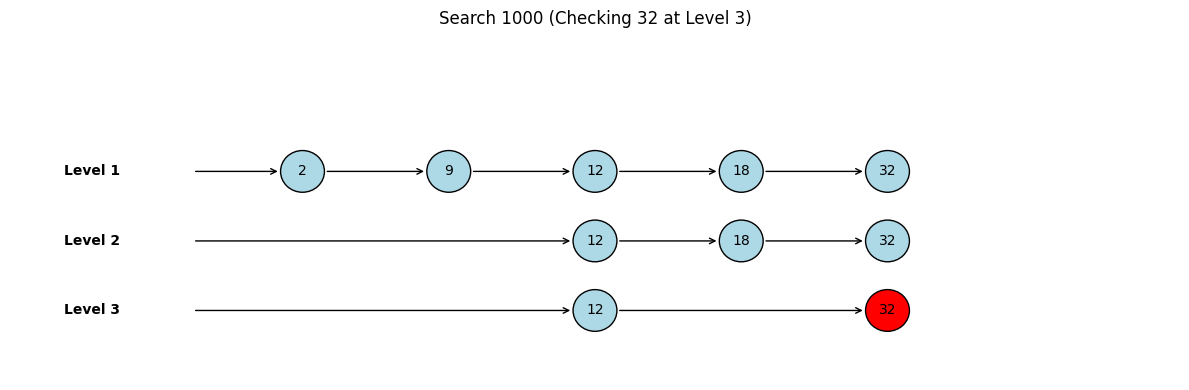

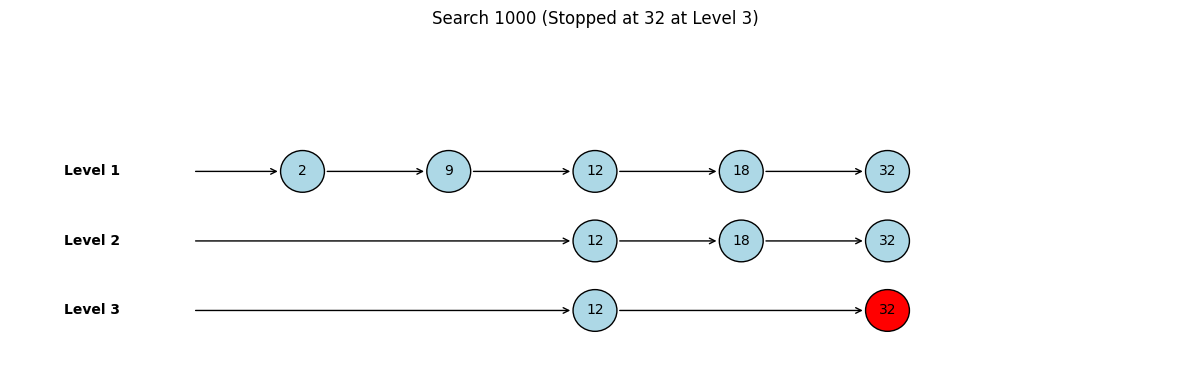

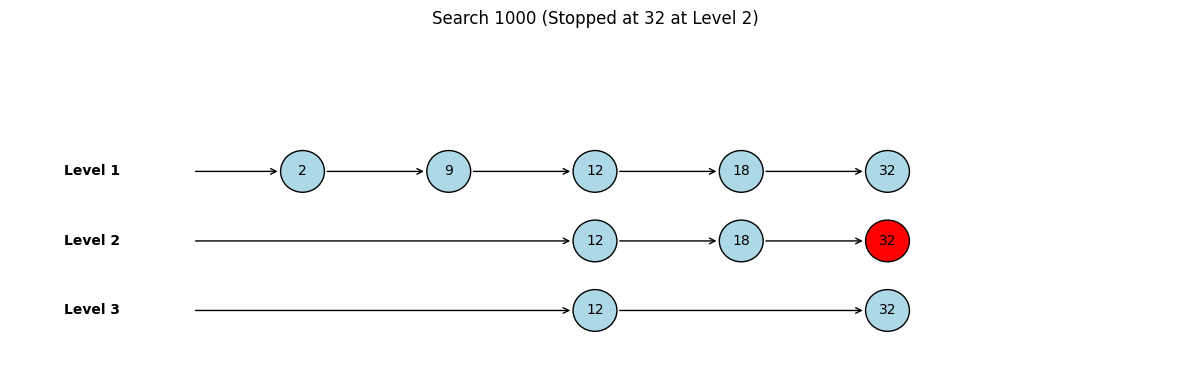

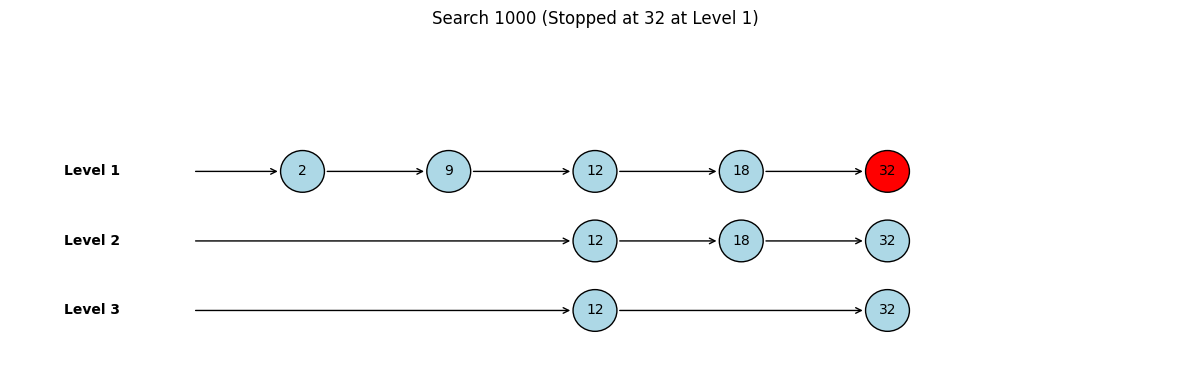

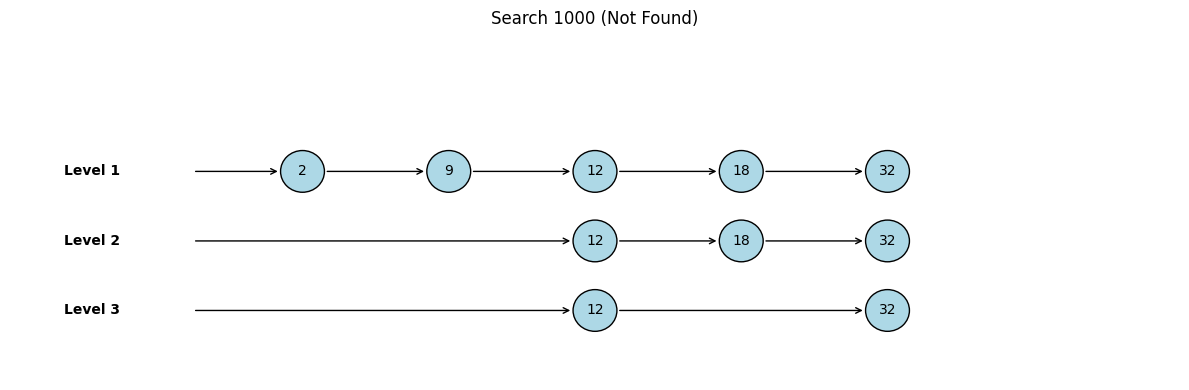

In [6]:
s.search(7)
s.search(32)
s.search(1000)

# Deleting Values

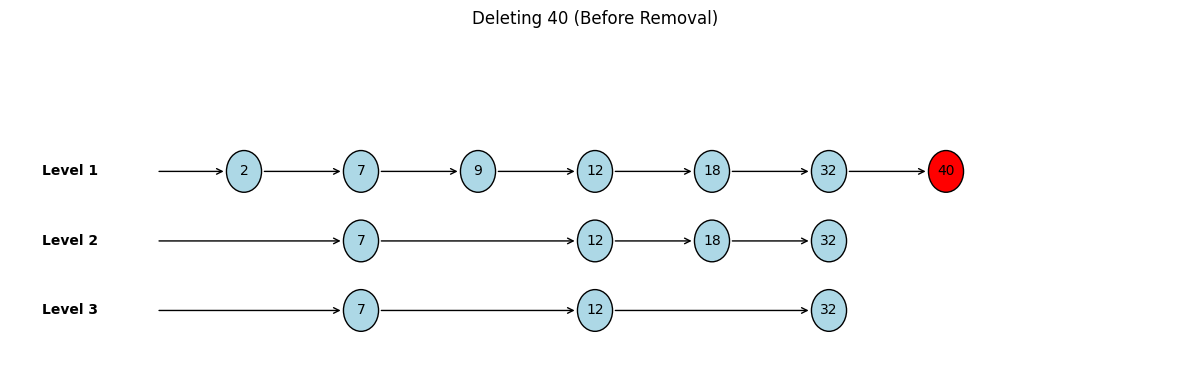

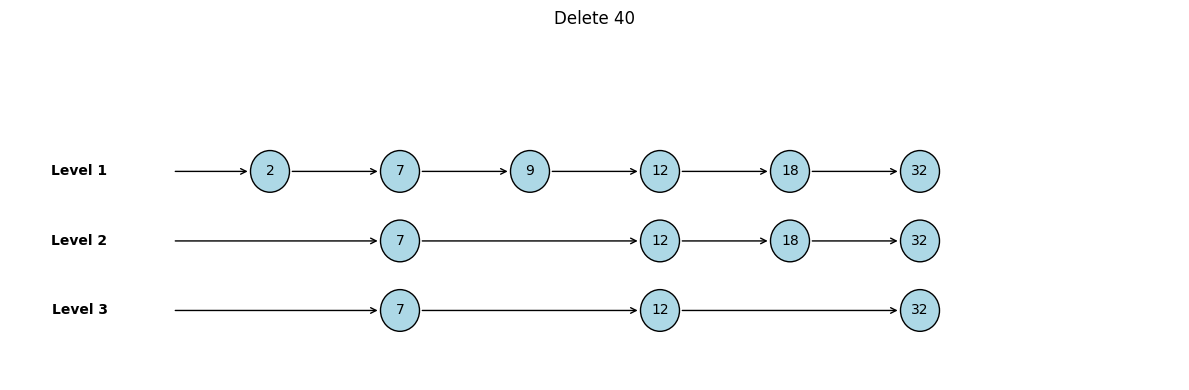

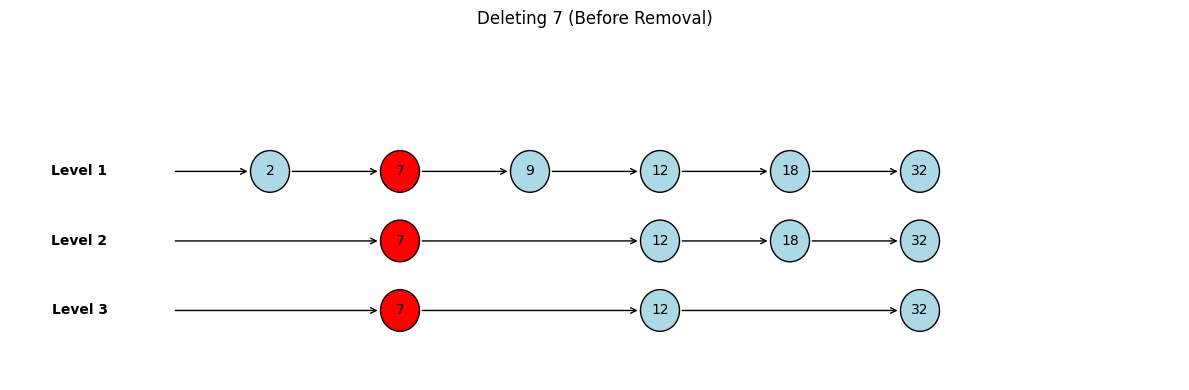

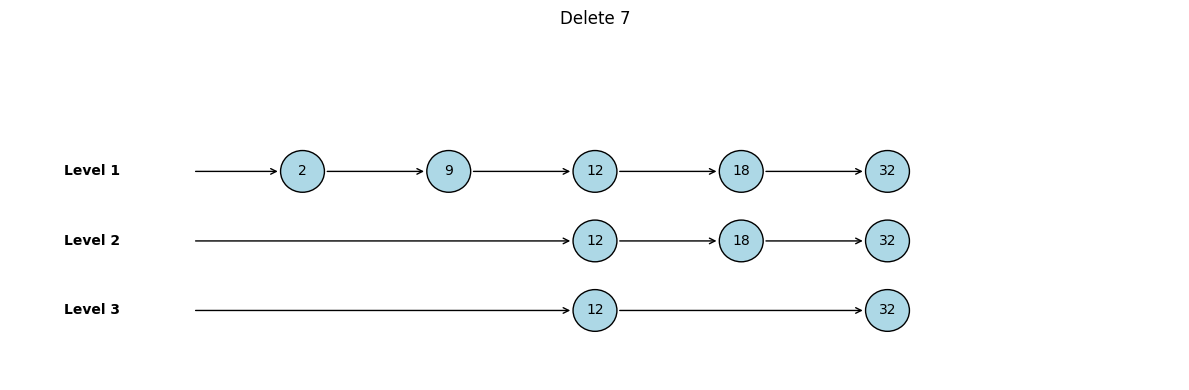

In [5]:
s.delete(values[4])
s.delete(values[6])